In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from datetime import date, datetime
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm, tree

In [2]:
df = pd.read_csv('../data/full_data.csv', usecols=range(8))
df

,Date,PM10,NO2,NOx,NO,O3,SO2,CO
0,1262304000,103.0,18.0,19.0,1.0,47.0,7.0,0.4
1,1262307600,18.0,14.0,14.0,1.0,54.0,6.0,0.4
2,1262311200,13.0,10.0,11.0,1.0,57.0,6.0,0.4
3,1262314800,11.0,11.0,12.0,0.0,55.0,5.0,0.4
4,1262318400,15.0,9.0,10.0,1.0,58.0,3.0,0.4
...,...,...,...,...,...,...,...,...
622078,1546282800,19.0,16.0,26.0,7.0,NaN,NaN,NaN
622079,1546286400,13.0,10.0,15.0,3.0,NaN,NaN,NaN
622080,1546290000,13.0,12.0,14.0,2.0,NaN,NaN,NaN
622081,1546293600,20.0,13.0,18.0,3.0,NaN,NaN,NaN


In [3]:
df.head(30)

,Date,PM10,NO2,NOx,NO,O3,SO2,CO
0,1262304000,103.0,18.0,19.0,1.0,47.0,7.0,0.4
1,1262307600,18.0,14.0,14.0,1.0,54.0,6.0,0.4
2,1262311200,13.0,10.0,11.0,1.0,57.0,6.0,0.4
3,1262314800,11.0,11.0,12.0,0.0,55.0,5.0,0.4
4,1262318400,15.0,9.0,10.0,1.0,58.0,3.0,0.4
5,1262322000,7.0,9.0,9.0,0.0,60.0,3.0,0.4
6,1262325600,7.0,NaN,NaN,NaN,NaN,NaN,NaN
7,1262329200,9.0,NaN,NaN,NaN,NaN,NaN,NaN
8,1262332800,13.0,8.0,9.0,0.0,56.0,5.0,0.4
9,1262336400,17.0,10.0,10.0,0.0,54.0,5.0,0.4


In [4]:
df.dtypes

Date      int64
PM10    float64
NO2     float64
NOx     float64
NO      float64
O3      float64
SO2     float64
CO      float64
dtype: object

In [5]:
df.shape

(622083, 8)

In [6]:
df.describe()

,Date,PM10,NO2,NOx,NO,O3,SO2,CO
count,6.220830e+05,604192.000000,607386.000000,609886.000000,610127.000000,532916.000000,453845.000000,263692.000000
mean,1.406104e+09,20.162885,25.413785,49.746648,20.030299,24.316323,12.403166,0.908797
std,8.110784e+07,15.317082,19.036658,66.268244,35.125914,29.260701,22.963657,2.526344
min,1.262304e+09,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.336255e+09,10.000000,12.000000,15.000000,2.000000,1.000000,1.000000,0.200000
50%,1.406239e+09,16.000000,20.000000,27.000000,7.000000,8.000000,2.000000,0.300000
75%,1.476310e+09,26.000000,34.000000,52.000000,22.000000,45.000000,7.000000,1.000000
max,1.546297e+09,2013.000000,292.000000,2170.000000,1285.000000,345.000000,211.000000,573.000000


In [7]:
df.corr()

,Date,PM10,NO2,NOx,NO,O3,SO2,CO
Date,1.000000,-0.060596,-0.104120,-0.037638,0.013741,-0.091838,0.100867,-0.002020
PM10,-0.060596,1.000000,0.417040,0.333113,0.315814,-0.143066,-0.057937,0.067682
NO2,-0.104120,0.417040,1.000000,0.819791,0.623264,-0.281746,-0.298346,-0.054244
NOx,-0.037638,0.333113,0.819791,1.000000,0.900308,-0.278823,-0.232266,-0.043631
NO,0.013741,0.315814,0.623264,0.900308,1.000000,-0.259311,0.137955,0.209277
O3,-0.091838,-0.143066,-0.281746,-0.278823,-0.259311,1.000000,-0.383983,-0.201208
SO2,0.100867,-0.057937,-0.298346,-0.232266,0.137955,-0.383983,1.000000,0.264123
CO,-0.002020,0.067682,-0.054244,-0.043631,0.209277,-0.201208,0.264123,1.000000


In [8]:
# pd.plotting.scatter_matrix(df, figsize=(15, 15))

In [9]:
# Shift O3 column by 24 periods (1 day) for prediction
df['O3'] = df['O3'].shift(-24)

In [10]:
df.shape
df

,Date,PM10,NO2,NOx,NO,O3,SO2,CO
0,1262304000,103.0,18.0,19.0,1.0,57.0,7.0,0.4
1,1262307600,18.0,14.0,14.0,1.0,55.0,6.0,0.4
2,1262311200,13.0,10.0,11.0,1.0,55.0,6.0,0.4
3,1262314800,11.0,11.0,12.0,0.0,58.0,5.0,0.4
4,1262318400,15.0,9.0,10.0,1.0,61.0,3.0,0.4
...,...,...,...,...,...,...,...,...
622078,1546282800,19.0,16.0,26.0,7.0,NaN,NaN,NaN
622079,1546286400,13.0,10.0,15.0,3.0,NaN,NaN,NaN
622080,1546290000,13.0,12.0,14.0,2.0,NaN,NaN,NaN
622081,1546293600,20.0,13.0,18.0,3.0,NaN,NaN,NaN


In [11]:
# Clean up entries with NaN values
df = df.dropna()
df.head(24)

,Date,PM10,NO2,NOx,NO,O3,SO2,CO
0,1262304000,103.0,18.0,19.0,1.0,57.0,7.0,0.4
1,1262307600,18.0,14.0,14.0,1.0,55.0,6.0,0.4
2,1262311200,13.0,10.0,11.0,1.0,55.0,6.0,0.4
3,1262314800,11.0,11.0,12.0,0.0,58.0,5.0,0.4
4,1262318400,15.0,9.0,10.0,1.0,61.0,3.0,0.4
5,1262322000,7.0,9.0,9.0,0.0,47.0,3.0,0.4
9,1262336400,17.0,10.0,10.0,0.0,50.0,5.0,0.4
10,1262340000,18.0,8.0,9.0,1.0,47.0,3.0,0.4
11,1262343600,15.0,8.0,9.0,1.0,49.0,3.0,0.4
12,1262347200,12.0,9.0,11.0,1.0,51.0,4.0,0.4


In [12]:
df = df.reset_index(drop=True)
df.head(24)

,Date,PM10,NO2,NOx,NO,O3,SO2,CO
0,1262304000,103.0,18.0,19.0,1.0,57.0,7.0,0.4
1,1262307600,18.0,14.0,14.0,1.0,55.0,6.0,0.4
2,1262311200,13.0,10.0,11.0,1.0,55.0,6.0,0.4
3,1262314800,11.0,11.0,12.0,0.0,58.0,5.0,0.4
4,1262318400,15.0,9.0,10.0,1.0,61.0,3.0,0.4
5,1262322000,7.0,9.0,9.0,0.0,47.0,3.0,0.4
6,1262336400,17.0,10.0,10.0,0.0,50.0,5.0,0.4
7,1262340000,18.0,8.0,9.0,1.0,47.0,3.0,0.4
8,1262343600,15.0,8.0,9.0,1.0,49.0,3.0,0.4
9,1262347200,12.0,9.0,11.0,1.0,51.0,4.0,0.4


In [13]:
# Divide predictors and result
time = df['Date']
x_raw = df.loc[:, np.logical_and(df.columns != 'Date', df.columns != 'O3')]
y_raw = df['O3']

In [14]:
x_raw

,PM10,NO2,NOx,NO,SO2,CO
0,103.0,18.0,19.0,1.0,7.0,0.4
1,18.0,14.0,14.0,1.0,6.0,0.4
2,13.0,10.0,11.0,1.0,6.0,0.4
3,11.0,11.0,12.0,0.0,5.0,0.4
4,15.0,9.0,10.0,1.0,3.0,0.4
...,...,...,...,...,...,...
242160,9.0,6.0,17.0,18.0,45.0,4.0
242161,8.0,6.0,11.0,13.0,51.0,2.0
242162,7.0,5.0,11.0,12.0,55.0,3.0
242163,7.0,6.0,9.0,9.0,57.0,2.0


In [15]:
# Print unique values for each column to check
for col in x_raw:
    print(x_raw[col].unique())

[1.030e+02 1.800e+01 1.300e+01 1.100e+01 1.500e+01 7.000e+00 1.700e+01
 1.200e+01 2.100e+01 9.000e+00 1.000e+01 6.000e+00 5.000e+00 1.400e+01
 8.000e+00 2.800e+01 5.400e+01 5.000e+01 7.400e+01 8.900e+01 4.400e+01
 4.200e+01 3.600e+01 2.300e+01 2.700e+01 2.000e+01 2.500e+01 2.200e+01
 1.900e+01 1.600e+01 2.600e+01 3.000e+01 3.400e+01 4.100e+01 3.100e+01
 2.900e+01 2.400e+01 3.200e+01 4.300e+01 3.500e+01 4.000e+01 3.700e+01
 3.300e+01 4.600e+01 2.000e+00 4.000e+00 3.900e+01 4.500e+01 4.700e+01
 4.800e+01 5.100e+01 5.500e+01 5.800e+01 6.100e+01 6.500e+01 6.800e+01
 6.900e+01 7.100e+01 7.300e+01 7.600e+01 7.800e+01 8.300e+01 9.200e+01
 9.100e+01 8.400e+01 7.200e+01 5.700e+01 5.300e+01 8.800e+01 7.000e+01
 6.400e+01 5.900e+01 3.000e+00 6.600e+01 6.300e+01 4.900e+01 5.200e+01
 6.700e+01 7.500e+01 8.700e+01 9.000e+01 8.600e+01 8.200e+01 5.600e+01
 6.200e+01 9.500e+01 9.400e+01 3.800e+01 7.700e+01 6.000e+01 2.140e+02
 1.000e+02 1.110e+02 1.560e+02 8.500e+01 1.350e+02 1.150e+02 1.120e+02
 1.100

In [16]:
# Apply linear rescaling to avoid difference in weights or distance measure
scaler_x, scaler_y = MinMaxScaler(), MinMaxScaler()
x = scaler_x.fit_transform(x_raw)
y = scaler_y.fit_transform(np.array(y_raw).reshape(-1, 1))

In [17]:
# Divide Date into several time predictors
time_x = np.array([[int(datetime.fromtimestamp(t).strftime(f'%{fmt_code}')) for t in time] for fmt_code in ['Y', 'm', 'd', 'H']]).transpose()
time_x

array([[2010,    1,    1,    1],
       [2010,    1,    1,    2],
       [2010,    1,    1,    3],
       ...,
       [2018,   12,   31,   22],
       [2018,   12,   31,   23],
       [2019,    1,    1,    0]])

In [18]:
x_all = np.concatenate((x, time_x), axis=1)
x_all

array([[5.02237693e-02, 6.79245283e-02, 3.11986864e-02, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [7.95624068e-03, 5.28301887e-02, 2.29885057e-02, ...,
        1.00000000e+00, 1.00000000e+00, 2.00000000e+00],
       [5.46991546e-03, 3.77358491e-02, 1.80623974e-02, ...,
        1.00000000e+00, 1.00000000e+00, 3.00000000e+00],
       ...,
       [2.48632521e-03, 1.88679245e-02, 1.80623974e-02, ...,
        1.20000000e+01, 3.10000000e+01, 2.20000000e+01],
       [2.48632521e-03, 2.26415094e-02, 1.47783251e-02, ...,
        1.20000000e+01, 3.10000000e+01, 2.30000000e+01],
       [2.98359025e-03, 2.26415094e-02, 1.31362890e-02, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [19]:
df_all = pd.DataFrame(x_all, columns=list(x_raw.columns) + ['Year', 'Month', 'Day', 'Hour'])
df_all.head()

,PM10,NO2,NOx,NO,SO2,CO,Year,Month,Day,Hour
0,0.050224,0.067925,0.031199,0.001623,0.037433,0.000698,2010.0,1.0,1.0,1.0
1,0.007956,0.052830,0.022989,0.001623,0.032086,0.000698,2010.0,1.0,1.0,2.0
2,0.005470,0.037736,0.018062,0.001623,0.032086,0.000698,2010.0,1.0,1.0,3.0
3,0.004475,0.041509,0.019704,0.000000,0.026738,0.000698,2010.0,1.0,1.0,4.0
4,0.006464,0.033962,0.016420,0.001623,0.016043,0.000698,2010.0,1.0,1.0,5.0


In [20]:
x_all = df_all.to_numpy()
x_all

array([[5.02237693e-02, 6.79245283e-02, 3.11986864e-02, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [7.95624068e-03, 5.28301887e-02, 2.29885057e-02, ...,
        1.00000000e+00, 1.00000000e+00, 2.00000000e+00],
       [5.46991546e-03, 3.77358491e-02, 1.80623974e-02, ...,
        1.00000000e+00, 1.00000000e+00, 3.00000000e+00],
       ...,
       [2.48632521e-03, 1.88679245e-02, 1.80623974e-02, ...,
        1.20000000e+01, 3.10000000e+01, 2.20000000e+01],
       [2.48632521e-03, 2.26415094e-02, 1.47783251e-02, ...,
        1.20000000e+01, 3.10000000e+01, 2.30000000e+01],
       [2.98359025e-03, 2.26415094e-02, 1.31362890e-02, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [21]:
x_all.shape

(242165, 10)

In [22]:
# Use PCA to perform linear dimensionality reduction by keeping a subset of the predictors
pca = PCA(n_components=8)
x_low = pca.fit_transform(x_all)
print(x_low)

[[-1.47637509e+01 -1.04636210e+01  5.61315780e+00 ... -3.47058604e-02
  -3.35257298e-03 -4.51681957e-03]
 [-1.47620510e+01 -9.46363337e+00  5.61232220e+00 ... -5.41463664e-02
   3.10793930e-03  1.02276579e-03]
 [-1.47603512e+01 -8.46363683e+00  5.61151260e+00 ... -6.87381579e-02
   9.40901068e-03  3.67405005e-03]
 ...
 [ 1.53081389e+01  1.04787860e+01 -5.43140722e+00 ... -1.33773688e-02
  -5.04516194e-03  4.43104580e-03]
 [ 1.53098383e+01  1.14788036e+01 -5.43215414e+00 ... -1.24787729e-02
  -1.22271190e-02  2.09358813e-03]
 [-1.47669289e+01 -1.14613094e+01  5.46479325e+00 ... -1.96712877e-02
  -2.67386992e-03  9.07911327e-03]]


In [23]:
pca.explained_variance_

array([7.70769678e+01, 4.81506866e+01, 1.18312916e+01, 6.34695207e+00,
       2.04231284e-02, 3.08866902e-03, 1.13541867e-03, 3.48929651e-04])

In [24]:
# Divide data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_low, y)

In [25]:
# Initially use a regressor to predict value of O3 a day in advance
rgr = tree.DecisionTreeRegressor()
rgr_fit = rgr.fit(x_train, y_train)

In [26]:
rgr_fit.score(x_test, y_test)

0.7004302764359556

In [27]:
# Test MSE
y_predict = rgr_fit.predict(x_test)
score = mean_squared_error(y_predict, y_test)
print(score)

0.0022788064112941923


In [28]:
# Train MSE
y_predict_train = rgr_fit.predict(x_train)
score = mean_squared_error(y_predict_train, y_train)
print(score)

1.727752663088741e-08


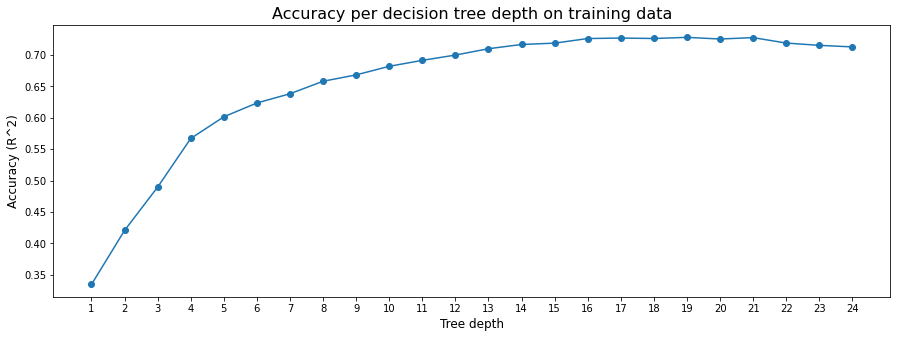

In [29]:
# Function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(x_train, x_test, y_train, y_test, tree_depths):
    cv_scores = []
    for depth in tree_depths:
        rgr = tree.DecisionTreeRegressor(max_depth=depth)
        rgr_fit = rgr.fit(x_train, y_train)
        score = rgr_fit.score(x_test, y_test)
        cv_scores.append(score)
    return cv_scores

# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores, title):
    fig, ax = plt.subplots(1, 1, figsize=(15, 5))
    ax.plot(depths, cv_scores, '-o')
    ylim = plt.ylim()
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=12)
    ax.set_ylabel('Accuracy (R^2)', fontsize=12)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)

# Fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_scores = run_cross_validation_on_trees(x_train, x_test, y_train, y_test, sm_tree_depths)

# Plotting regression accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_scores, 'Accuracy per decision tree depth on training data')
plt.show()

In [30]:
sm_scores

[0.3344275272954992,
 0.4205711345207217,
 0.4896641658771833,
 0.5670893806861377,
 0.6016813064614066,
 0.6237080673264,
 0.6384129474876377,
 0.6583244103717708,
 0.6684968309349804,
 0.6821499123418957,
 0.6916694672760518,
 0.7000836204337408,
 0.7101949042771671,
 0.7169608768838582,
 0.719095959135019,
 0.7264291046786184,
 0.7271835286616252,
 0.7264878702166564,
 0.7283099778420439,
 0.7256589804426435,
 0.7278877858122784,
 0.7191907861934427,
 0.7155659312847784,
 0.7130841361993482]